In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

In [2]:
email_df = pd.read_csv('combined_data.csv')

In [5]:
email_df.head()

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


In [3]:
email_df.drop_duplicates(inplace=True)

In [4]:
email_df.dropna(inplace=True)

In [7]:
email_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83448 entries, 0 to 83447
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   83448 non-null  int64 
 1   text    83448 non-null  object
 2   length  83448 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


In [6]:
#balanced dataset,equal instances of both
email_df.groupby('label').describe()

text                                                               
       count unique                                                top freq
label                                                                      
0      39538  39538   computer connection from cnn com wednesday es...    1
1      43910  43910  ounce feather bowl hummingbird opec moment ala...    1

In [5]:
#adding the length column
email_df['length'] = email_df['text'].apply(len)
email_df.head()

,label,text,length
0,1,ounce feather bowl hummingbird opec moment ala...,148
1,1,wulvob get your medircations online qnb ikud v...,808
2,0,computer connection from cnn com wednesday es...,2235
3,1,university degree obtain a prosperous future m...,592
4,0,thanks for all your answers guys i know i shou...,1362


/Users/aadityajoshi/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


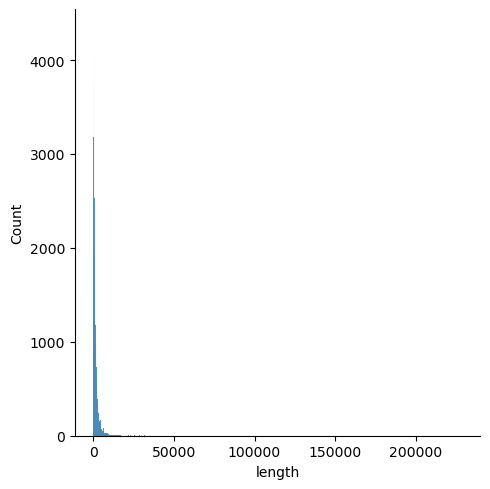

In [31]:
sns.displot(x='length',data=email_df)

In [8]:
email_df[email_df['length']==email_df['length'].max()]
#this is an anamoly

,label,text,length
52108,0,commit a snapshot of the generated prototype h...,598705


In [30]:
email_df.drop(52108,axis=0,inplace=True)

In [7]:
import string
import nltk
from nltk.corpus import stopwords

In [6]:
#cleaning text
"""
1.remove punctuation marks
2.remove stopwords
3.return
"""
def clean_message(message):
    no_punc = [char for char in message if char not in string.punctuation]
    no_punc = ''.join(no_punc)
    no_punc = no_punc.split()
    return [wrd for wrd in no_punc if wrd.lower() not in stopwords.words('english')]

In [8]:
email_df["text"].head().apply(clean_message)

0    [ounce, feather, bowl, hummingbird, opec, mome...
1    [wulvob, get, medircations, online, qnb, ikud,...
2    [computer, connection, cnn, com, wednesday, es...
3    [university, degree, obtain, prosperous, futur...
4    [thanks, answers, guys, know, checked, rsync, ...
Name: text, dtype: object

In [12]:
"""Now as the text cleaning fucntion is ready its time for word embedding:
Methods:
1.Countvectorizer(BOW)
Models:
1.Dtree
2.RFC
3.SVM
4.NB
"""

'Now as the text cleaning fucntion is ready its time for word embedding:\nMethods:\n1.Countvectorizer(BOW)\nModels:\n1.Dtree\n2.RFC\n3.SVM\n4.NB\n'

In [9]:
#countvectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

In [10]:
#splitting the data
text,label = email_df['text'],email_df['label']
text_train,text_test,label_train,label_test = train_test_split(text,label,test_size=0.3)


# Bag of Words (CountVectorizer)


In [11]:
#creating 4 pipelines for Bag of words transformation
bow_dtree_pipeline = Pipeline([
    ("bow",CountVectorizer(analyzer=clean_message)),
    ('classifier',DecisionTreeClassifier())])

bow_rfc_pipeline = Pipeline([
    ("bow",CountVectorizer(analyzer=clean_message)),
    ('classifier',RandomForestClassifier())])

bow_svm_pipeline = Pipeline([
    ("bow",CountVectorizer(analyzer=clean_message)),
    ('classifier',DecisionTreeClassifier())])

bow_NB_pipeline = Pipeline([
    ("bow",CountVectorizer(analyzer=clean_message)),
    ('classifier',MultinomialNB())])

In [12]:
from sklearn.metrics import classification_report

In [38]:
#Dtree
bow_dtree_pipeline.fit(text_train,label_train)
bow_dtree_pipeline_pred = bow_dtree_pipeline.predict(text_test)
print("Decision Tree","\n")
print(classification_report(label_test,bow_dtree_pipeline_pred))

Decision Tree 

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     11839
           1       0.97      0.96      0.96     13196

    accuracy                           0.96     25035
   macro avg       0.96      0.96      0.96     25035
weighted avg       0.96      0.96      0.96     25035



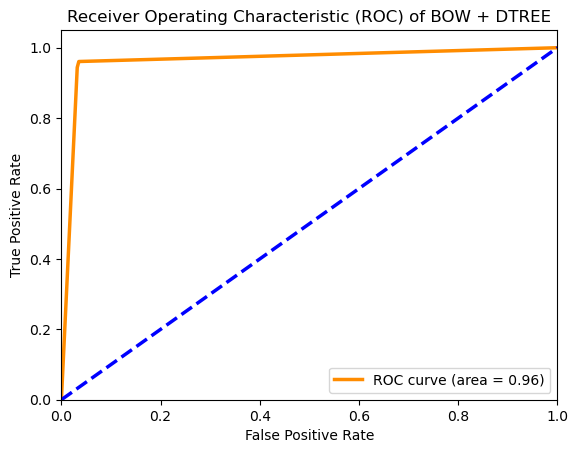

In [40]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# Predict probabilities on the test set
bow_dtree_pipeline_probs = bow_dtree_pipeline.predict_proba(text_test)

# Extract probabilities for the positive class (class 1)
fpr, tpr, thresholds = roc_curve(label_test, bow_dtree_pipeline_probs[:, 1])

# Calculate the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2.5, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) of BOW + DTREE')
plt.legend(loc="lower right")
plt.show()


In [41]:
#RFC
bow_rfc_pipeline.fit(text_train,label_train)
bow_rfc_pipeline_pred = bow_rfc_pipeline.predict(text_test)
print("Random Forest Classifier","\n")
print(classification_report(label_test,bow_rfc_pipeline_pred))

Random Forest Classifier 

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11839
           1       0.99      0.98      0.98     13196

    accuracy                           0.98     25035
   macro avg       0.98      0.98      0.98     25035
weighted avg       0.98      0.98      0.98     25035



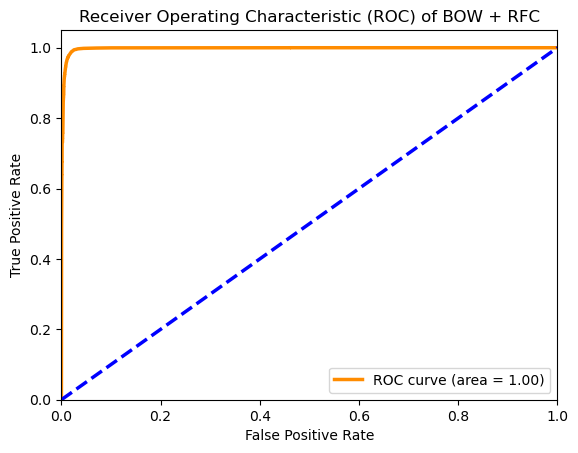

In [43]:
# Predict probabilities on the test set
bow_rfc_pipeline_probs = bow_rfc_pipeline.predict_proba(text_test)

# Extract probabilities for the positive class (class 1)
fpr, tpr, thresholds = roc_curve(label_test, bow_rfc_pipeline_probs[:, 1])

# Calculate the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2.5, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) of BOW + RFC')
plt.legend(loc="lower right")
plt.show()


In [13]:
#SVM
bow_svm_pipeline.fit(text_train,label_train)
bow_svm_pipeline_pred = bow_svm_pipeline.predict(text_test)
print("SVM","\n")
print(classification_report(label_test,bow_svm_pipeline_pred))

SVM 

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     11775
           1       0.97      0.96      0.96     13260

    accuracy                           0.96     25035
   macro avg       0.96      0.96      0.96     25035
weighted avg       0.96      0.96      0.96     25035



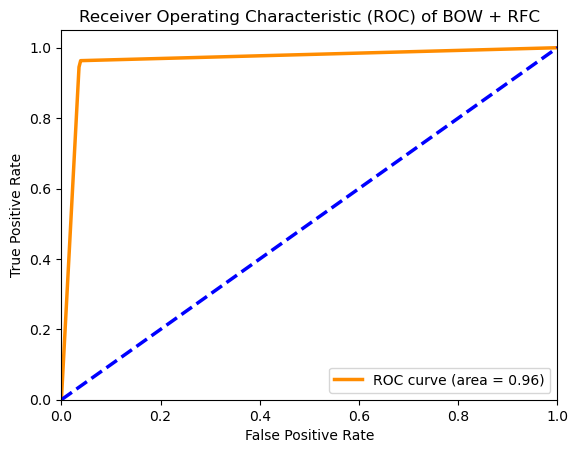

In [15]:
# Predict probabilities on the test set
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
bow_svm_pipeline_probs = bow_svm_pipeline.predict_proba(text_test)

# Extract probabilities for the positive class (class 1)
fpr, tpr, thresholds = roc_curve(label_test, bow_svm_pipeline_probs[:, 1])

# Calculate the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2.5, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) of BOW + RFC')
plt.legend(loc="lower right")
plt.show()

In [56]:
#NB
bow_NB_pipeline.fit(text_train,label_train)
bow_NB_pipeline_pred = bow_NB_pipeline.predict(text_test)
print("Naive Bayes","\n")
print(classification_report(label_test,bow_NB_pipeline_pred))

Naive Bayes 

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     11827
           1       0.99      0.96      0.97     13208

    accuracy                           0.97     25035
   macro avg       0.97      0.97      0.97     25035
weighted avg       0.97      0.97      0.97     25035

